# 1. Implementation of linear regression 
## 1.1. Analytical approach

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.datasets import make_regression
import time

np.set_printoptions(precision=3) # Setting global precision (only for print)

def linear_regression_analytical(X: np.ndarray, y: np.ndarray, plot_title: str = None):
    """
    Solve linear regression using analytical approach
    
    Args: 
        X: Matrix with shape (n_features, n_samples)
        y: Target values with shape (n_samples)
        plot_title: Title for visualization 

    Returns:
        Optimal weight vector
    """
    start_time = time.time() # start of counting time
    w = np.linalg.inv(X @ X.T) @ X @ y # vector of weights, theta
    y_pred = np.dot(X.T,w) # alternative way for multiplying matrix
    end_time = time.time() # End of counting time 
    plt.scatter(X[1,:], y, label = "Actual values")
    plt.scatter(X[1,:], y_pred, label = "Predicted values", color = "red")
    plt.title(f"{plot_title}")
    plt.legend()
    plt.show()
    
    print(f"Operation time for analytical approach for linear regression: {end_time - start_time:.5f}s")
    print(f"Finded vector of weights is equal: {w}")

## 1.2. Numerical approach

In [8]:
def linear_regression_numerical(X: np.ndarray, y: np.ndarray, plot_title: str = None):
    """
    Solve linear regression using numerical optimization.
    
    Args: 
        X: Matrix with shape (n_features, n_samples)
        y: Target values with shape (n_samples)
        plot_title: Title for visualization 

    Returns:
        Optimal weight vector
        
    Notes:
        Vector of weight should be initializated with standard normal distribution not with zeros
    """
    random_generator = np.random.default_rng()
    start_time = time.time() # start counting time
    w_begin = random_generator.standard_normal((X.shape[0])) 
    result = minimize(loss_function, w_begin, args=(X,y), method='Powell') 
    """
    The minimize function finds the minimum of a function that takes a parameter vector as arguments.
    In this case, we're minimizing the mean squared error function. w_begin contains the initial values of the parameter vector where optimization begins,
    args passes additional arguments to the loss function, and the Powell method is one of the gradient-free optimization techniques.
    The algorithm iteratively adjusts the weight values to minimize the loss function.
    """
    y_pred = np.dot(X.T, result.x)
    end_time = time.time()
    plt.scatter(X[1,:], y, label = "Actual values")
    plt.scatter(X[1,:], y_pred, label = "Predicted values", color = "red")
    plt.title(f"{plot_title}")
    plt.legend()
    plt.show()
    
    print(f"Operation time for numerical approach for linear regression: {end_time - start_time:.5f}s")
    print(f"Finded vector of weights is equal::{result.x}")


def loss_function(w: np.ndarray, X: np.ndarray, y: np.ndarray) -> float:
    """
    Computes mean squared error loss
    
    Args: 
        w: Weight vector
        X: Design matrix
        y: Target values

    Returns: 
        Mean squared error
    """
    amount_of_samples = len(y)
    loss = y - (X.T @ w) # computing difference between acutal value and predicted
    loss_function = (1/amount_of_samples) * (loss.T @ loss)
    # L(w) means loss function in relation with weight vector, here is like MSE
    return loss_function

## 1.3 Compare of analytical and numerical approach 

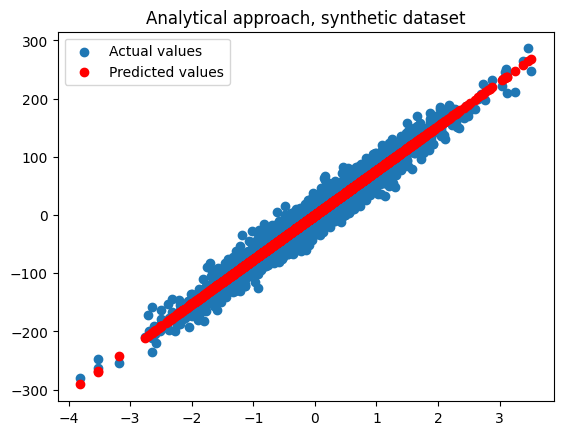

Operation time for analytical approach for linear regression: 0.00061s
Finded vector of weights is equal: [-0.183 76.351]





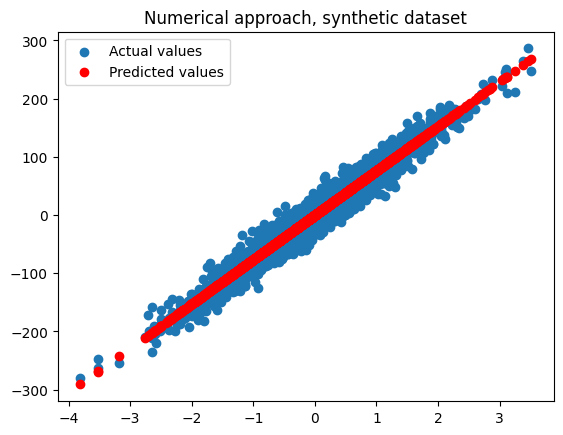

Operation time for numerical approach for linear regression: 0.00393s
Finded vector of weights is equal::[-0.183 76.351]


In [9]:
x, y  = make_regression(n_samples=2587, n_features=1, noise=16, random_state=254687)
X = np.array([np.ones(shape=x.shape[0]), x.flatten()]) 
"""
Expanded data matrix (containing a row of '1's needed to account for the bias term). In other words:
np.ones(shape=x.shape[0]) creates a vector of ones with length equal to the number of samples in X, where x.shape[0] gets exactly the sample count
x.flatten() transforms the x matrix with shape (n_samples x 1) into a one-dimensional vector, effectively "flattening" the array
"""

linear_regression_analytical(X, y, "Analytical approach, synthetic dataset")
print("\n\n")
linear_regression_numerical(X, y, "Numerical approach, synthetic dataset")   

**Conclusion**: For this size of dataset analytical version is faster than numerical 

# 2. Linear Regression example using Flappy Bird

## 2.1 Uploading dataset: minimal, optimal, complete

In [10]:
# map makes that every element of list is converted on float
minimal_set = np.array([list(map(float, line.strip().split(','))) for line in open('zbiorminimalny.csv', 'r')])
optimal_set = np.array([list(map(float, line.strip().split(','))) for line in open('zbioroptymalny.csv', 'r')])
complete_set = np.array([list(map(float, line.strip().split(','))) for line in open('zbiorpelny.csv', 'r')])

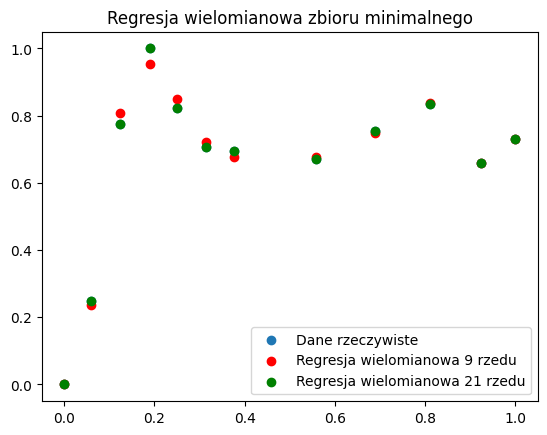

Czas wykonywania operacji dla wersji wielomianowej regresji liniowej wyniósł:0.004960775375366211
Bład sredniokwadratowy dla regresji liniowej wielomianowej stopnia 9 wyniósł: 0.0003917072833883785
Bład sredniokwadratowy dla regresji liniowej wielomianowej stopnia 21 wyniósł: 1.803464167284223e-22






Operation time for analytica approach using polynomial of 9 degree for linear regression:0.0004553794860839844
Operation time for analytica approach using polynomial of 21 degree for linear regression:0.0003371238708496094


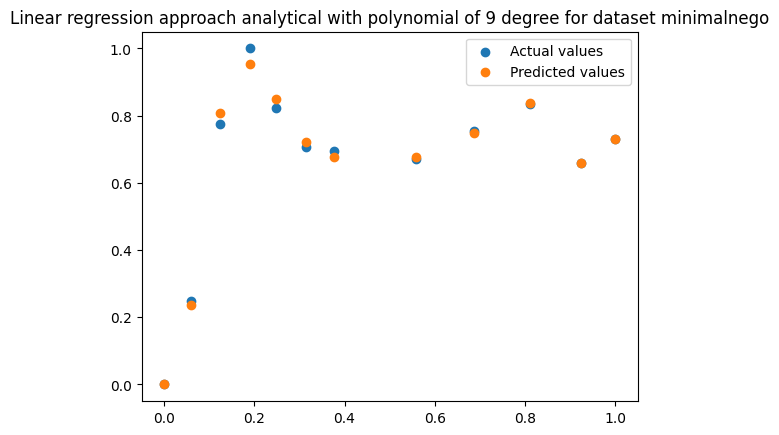

MSE for Linear regression approach analytical with polynomial of 9 degree: 0.00039170802762717355





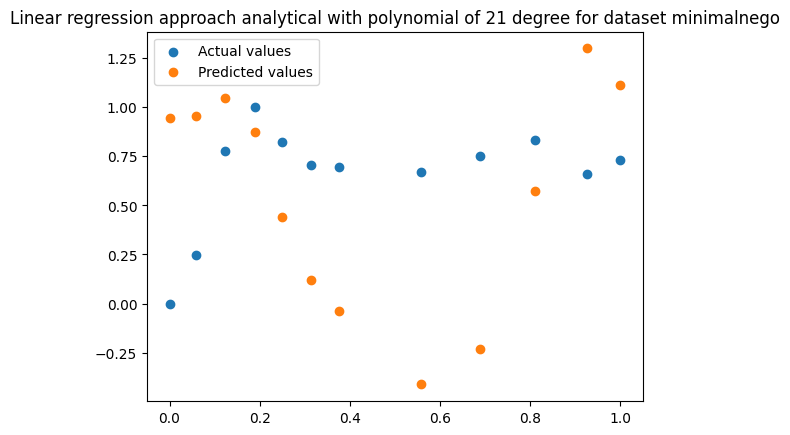

MSE for Linear regression approach analytical with polynomial of 21 degree: 0.4402435723199345








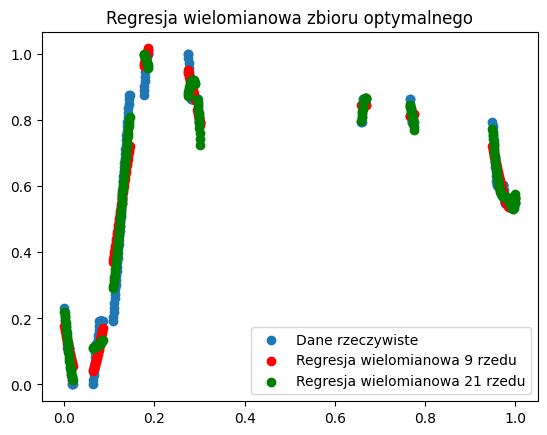

Czas wykonywania operacji dla wersji wielomianowej regresji liniowej wyniósł:0.004312276840209961
Bład sredniokwadratowy dla regresji liniowej wielomianowej stopnia 9 wyniósł: 0.0028296783881606676
Bład sredniokwadratowy dla regresji liniowej wielomianowej stopnia 21 wyniósł: 0.0015806179657675303






Operation time for analytica approach using polynomial of 9 degree for linear regression:0.0005028247833251953
Operation time for analytica approach using polynomial of 21 degree for linear regression:0.0004334449768066406


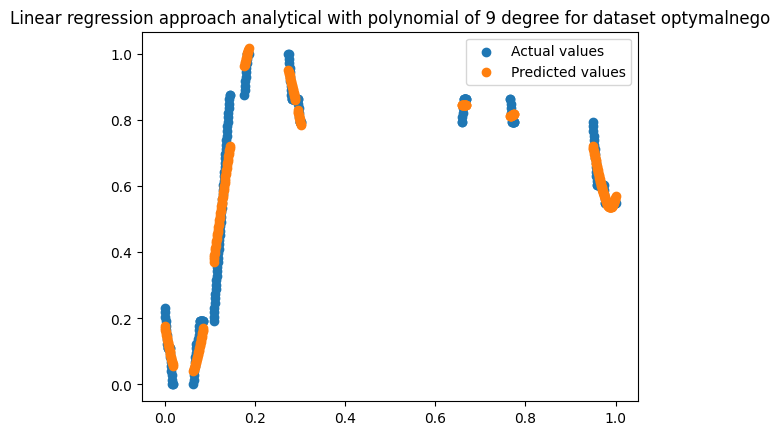

MSE for Linear regression approach analytical with polynomial of 9 degree: 0.002829697272320042





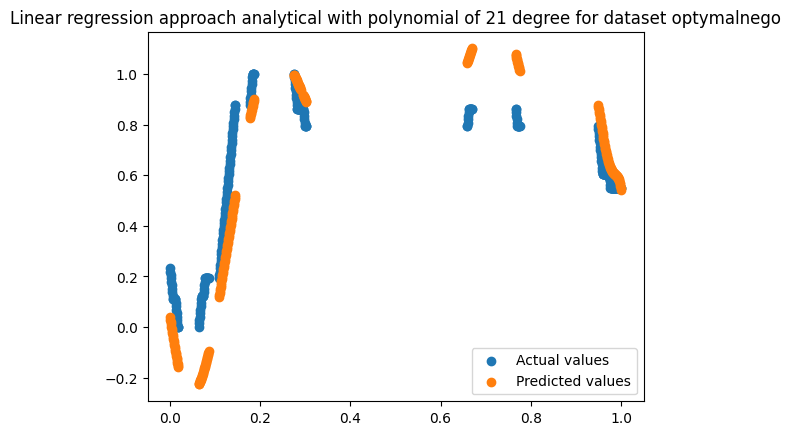

MSE for Linear regression approach analytical with polynomial of 21 degree: 0.034809964469802376








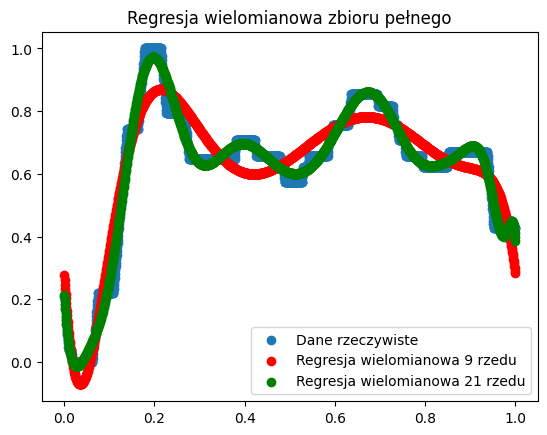

Czas wykonywania operacji dla wersji wielomianowej regresji liniowej wyniósł:0.004152536392211914
Bład sredniokwadratowy dla regresji liniowej wielomianowej stopnia 9 wyniósł: 0.0050712146184949585
Bład sredniokwadratowy dla regresji liniowej wielomianowej stopnia 21 wyniósł: 0.0010402593297543902






Operation time for analytica approach using polynomial of 9 degree for linear regression:0.0005898475646972656
Operation time for analytica approach using polynomial of 21 degree for linear regression:0.0005583763122558594


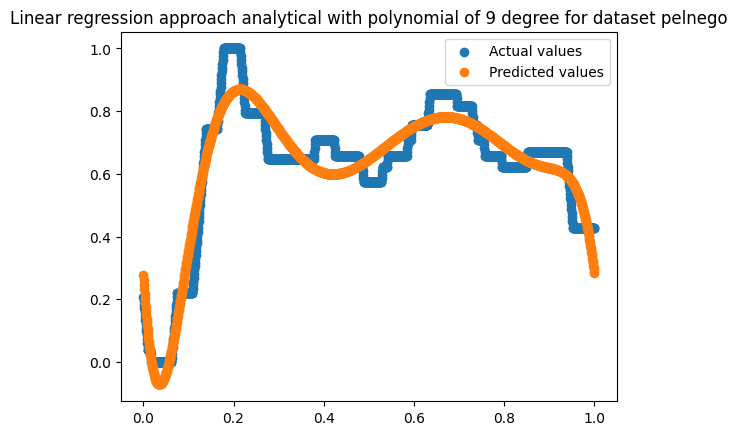

MSE for Linear regression approach analytical with polynomial of 9 degree: 0.0050712147011000705





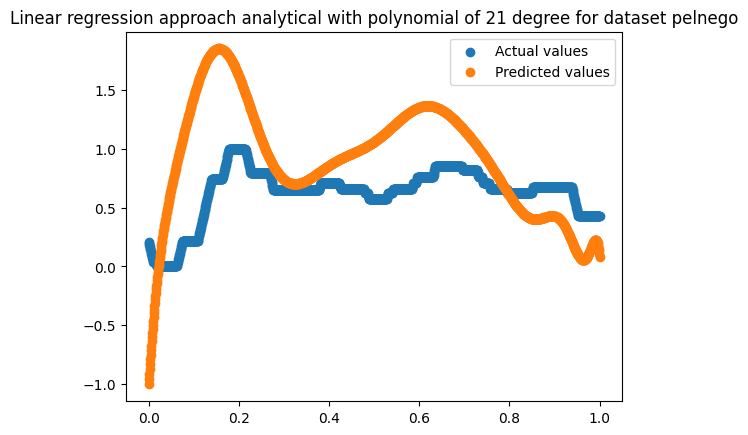

MSE for Linear regression approach analytical with polynomial of 21 degree: 0.2728482618748448





In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating polynomials
polynomial_features_9 = PolynomialFeatures(degree=9)
polynomial_features_21 = PolynomialFeatures(degree=21)

# Creating new models of linear regression
model_9 = LinearRegression()
model_21 = LinearRegression()


def linear_regression_polynomial(dataset: np.ndarray, plot_title: str):
    
    x_analytics = dataset[:,0]
    y_analytics = dataset[:,1]

    x_max_analytics = x_analytics.max()
    y_max_analytics = y_analytics.max()

    x_min_analytics = x_analytics.min()
    y_min_analytics = y_analytics.min()

    # Normalize samples
    x_norm_analytics = (x_analytics - x_min_analytics) / (x_max_analytics - x_min_analytics)
    y_norm_analytics = (y_analytics - y_min_analytics) / (y_max_analytics - y_min_analytics)

    # Polynomial of 9 degree
    start_time = time.time()
    X_9_analytics = polynomial_features_9.fit_transform(x_norm_analytics.reshape(-1,1))
    w_9 = np.linalg.inv(X_9_analytics.T @  X_9_analytics) @ X_9_analytics.T @ y_norm_analytics
    y_pred_9_analytics = np.dot(X_9_analytics, w_9)
    time_poly_9 = time.time() - start_time
    print(f"Operation time for analytica approach using polynomial of 9 degree for linear regression:{time_poly_9}s")

    # Polynomial of 21 degree
    start_time = time.time()
    X_21_analytics = polynomial_features_21.fit_transform(x_norm_analytics.reshape(-1,1))
    w_21 = np.linalg.inv(X_21_analytics.T @  X_21_analytics) @ X_21_analytics.T @ y_norm_analytics
    y_pred_21_analytics = np.dot(X_21_analytics, w_21)
    time_poly_21 = time.time() - start_time
    print(f"Operation time for analytica approach using polynomial of 21 degree for linear regression:{time_poly_21}s")

    # Computing MSE
    mse_9_analytics = mean_squared_error(y_norm_analytics, y_pred_9_analytics) 
    mse_21_analytics = mean_squared_error(y_norm_analytics, y_pred_21_analytics)

    plt.figure()
    plt.scatter(X_9_analytics[:,1], y_norm_analytics, label = "Actual values")
    plt.scatter(X_9_analytics[:,1], y_pred_9_analytics, label = "Predicted values")
    plt.title(f"Linear regression approach analytical with polynomial of 9 degree for dataset {plot_title}")
    plt.legend()
    plt.show()
    print(f"MSE for Linear regression approach analytical with polynomial of 9 degree: {mse_9_analytics}")
    print("\n\n")

    plt.figure()
    plt.scatter(X_21_analytics[:,1], y_norm_analytics, label = "Actual values")
    plt.scatter(X_21_analytics[:,1], y_pred_21_analytics, label = "Predicted values")
    plt.title(f"Linear regression approach analytical with polynomial of 21 degree for dataset {plot_title}")
    plt.legend()
    plt.show()
    print(f"MSE for Linear regression approach analytical with polynomial of 21 degree: {mse_21_analytics}")
    print("\n\n")


def sklearn_linear_regression(dataset, dataset_name):

    x = dataset[:,0].reshape(-1,1)
    y = dataset[:,1]

    x_max = x.max()
    y_max = y.max()

    x_min = x.min()
    y_min = y.min()

    # Normalize samples
    x_norm = (x - x_min) / (x_max - x_min) 
    y_norm = (y - y_min) / (y_max - y_min)

    # Polynomial of 9 degree
    start_time = time.time() 
    X_9 = polynomial_features_9.fit_transform(x_norm)
    model_9.fit(X_9, y_norm) 
    y_pred_9 = model_9.predict(X_9) # przewidywane wartosci na podstawie macierzy cech wielomianowych
    time_poly_9 = time.time() - start_time
    print(f"Operation time for linear regression from scikit learn using polynomial of 9 degree:{time_poly_9}s")
    
    # Polynomial of 21 degree
    start_time = time.time()
    X_21 = polynomial_features_21.fit_transform(x_norm)
    model_21.fit(X_21, y_norm)
    y_pred_21 = model_21.predict(X_21)
    time_poly_21 = time.time() - start_time
    print(f"Operation time for linear regression from scikit learn using polynomial of 21 degree:{time_poly_21}s")

    # MSE computing
    mse_9 = mean_squared_error(y_norm, y_pred_9) 
    mse_21 = mean_squared_error(y_norm, y_pred_21)

    plt.figure() # For separating diagrams
    plt.scatter(x_norm, y_norm, label = "Actual values")
    plt.scatter(x_norm, y_pred_9, color = "red", label = "Polynomial regression of 9 degree")
    plt.scatter(x_norm, y_pred_21, color = "green", label = "Polynomial regression of 21 degree")
    plt.title(f"Linear regression from scikit learn using polynomials for dataset: {dataset_name}")
    plt.legend()
    plt.show()

    print(f"MSE for regression with polunomial of 9 degree is equal: {mse_9}")
    print(f"BMSE for regression with polunomial of 21 degree is equal: {mse_21}")

    print("\n\n")

    #x_analytics = dataset[:,0]
    #x_max_analytics = x_analytics.max() # najwieksza wartosc x_min
    #x_norm_analytics = x_analytics / x_max_analytics # normalizuje probki
    #X_9_analytics = polynomial_features_9.fit_transform(x_norm_analytics.reshape(-1,1))
    #X_21_analytics = polynomial_features_21.fit_transform(x_norm_analytics.reshape(-1,1))



    #regresja_liniowa_analityczna(X_9_analytics.T, y_norm, f"Wersja analityczna z wielomianem stopnia 9 dla zbioru {dataset_name}")
    #regresja_liniowa_analityczna(X_21_analytics.T, y_norm, f"Wersja analityczna z wielomianem stopnia 21 dla zbioru {dataset_name}")

sklearn_linear_regression(minimal_set, "minimalnego")
print("\n\n")
linear_regression_polynomial(minimal_set, "minimalnego")
print("\n\n")
sklearn_linear_regression(optimal_set, "optymalnego")
print("\n\n")
linear_regression_polynomial(optimal_set, "optymalnego")
print("\n\n")
sklearn_linear_regression(complete_set, "pełnego")
print("\n\n")
linear_regression_polynomial(complete_set, "pelnego")


# 3. Ridge Regression

Ridge Regression to metoda regresji liniowej, która przeciwdziała problemowi nadmiernego dopasowania (ang. overfitting, przeuczenie). Polega to na tym że do funkcji kosztu, starty dodana zostaje kara o wartości proporcjonalnej do kwadratu normy współczynnikow. Ridge regression jest szczególnym przypadkiem regularyzacji Tichonowa, gdzie funkcja regulująca to kwadrat normy L2.

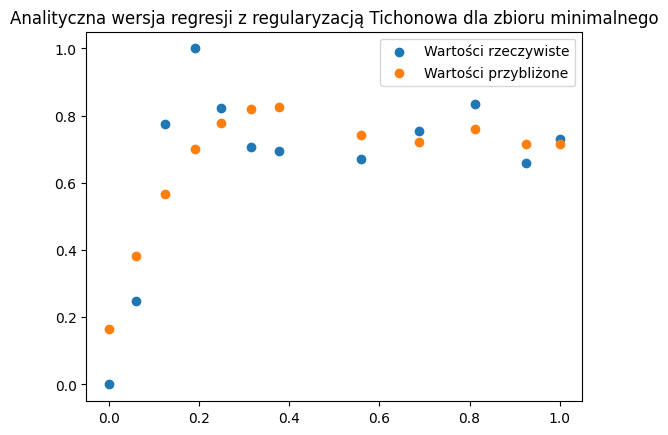

Czas wykonywania analitycznej regresji liniowej z regularyzacją Tichanowa wyniósł:0.0005576610565185547





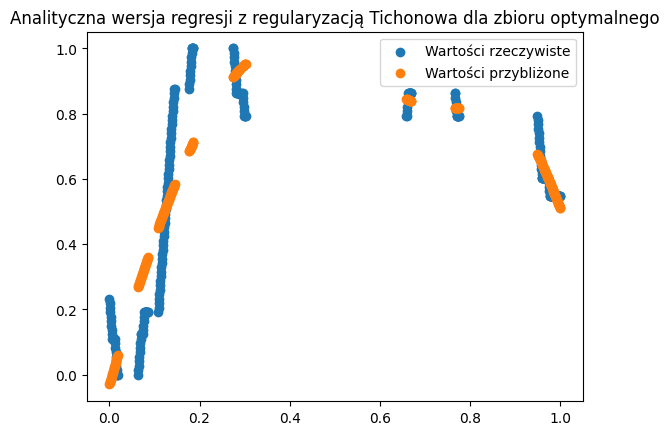

Czas wykonywania analitycznej regresji liniowej z regularyzacją Tichanowa wyniósł:0.0006418228149414062





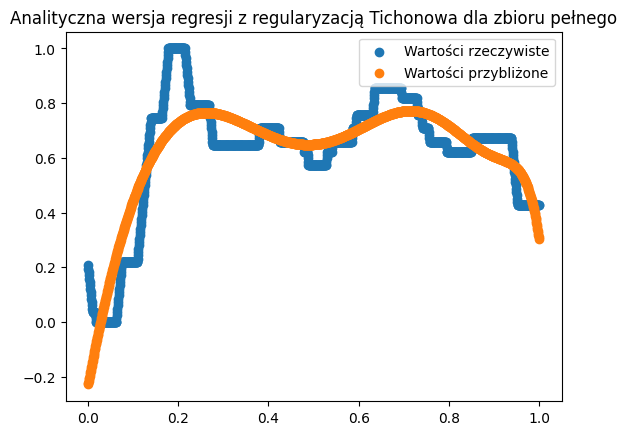

Czas wykonywania analitycznej regresji liniowej z regularyzacją Tichanowa wyniósł:0.0009310245513916016





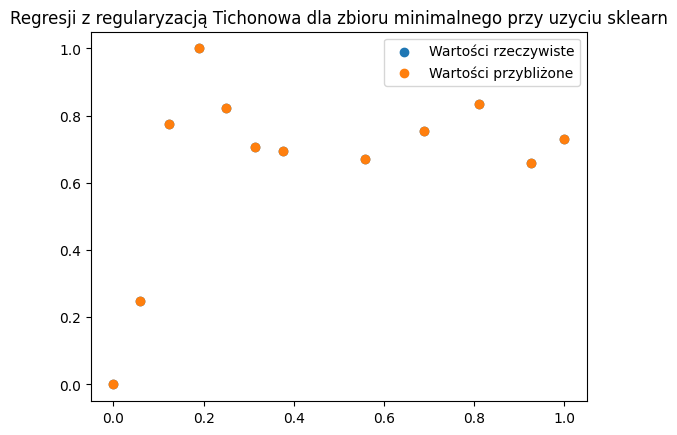

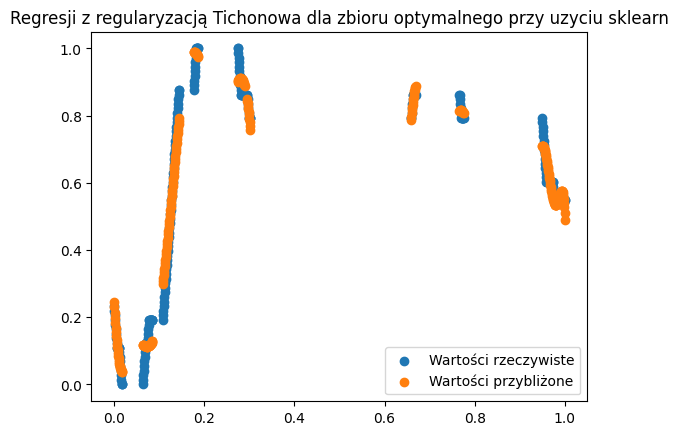

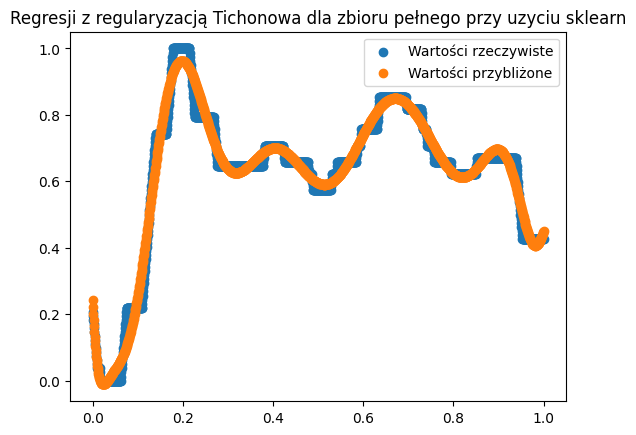

In [12]:
from sklearn.linear_model import Ridge

polynomial_features_16 = PolynomialFeatures(degree = 16)

def RidgeRegressionOwn (dataset, dataset_name):
  start_time = time.time()
  x = dataset[:,0] # wczytuje dane jako wspolrzedne
  y = dataset[:,1]
  x_max = x.max() # sprawdzam wartosc maksymalna
  x_min = x.min()
  y_max = y.max()
  y_min = y.min()
  x_norm = (x-x_min) / (x_max-x_min) # normalizuje próbki
  y_norm = (y-y_min) / (y_max-y_min)



  alpha = 0.001

  X_16 = polynomial_features_16.fit_transform(x_norm.reshape(-1,1))
  w_16 = np.linalg.inv(X_16.T @ X_16 + alpha*np.eye(X_16.shape[1])) @ X_16.T @ y_norm
  y_16_pred = X_16 @ w_16

  end_time = time.time()

  plt.scatter(x_norm, y_norm, label = "Wartości rzeczywiste")
  plt.scatter(x_norm, y_16_pred, label = "Wartości przybliżone")
  plt.title(f"Analityczna wersja regresji z regularyzacją Tichonowa dla zbioru {dataset_name}")
  plt.legend()
  plt.show()
  print(f"Czas wykonywania analitycznej regresji liniowej z regularyzacją Tichanowa wyniósł:{end_time - start_time}")
  print("\n\n")


RidgeRegressionOwn(minimal_set, "minimalnego")
RidgeRegressionOwn(optimal_set, "optymalnego")
RidgeRegressionOwn(complete_set, "pełnego")

def RidgeRegression(dataset, dataset_name):
  model_16 = LinearRegression()
  start_time = time.time()
  x = dataset[:,0]
  y = dataset[:,1]
  x_max = x.max()
  x_min = x.min()
  y_max = y.max()
  y_min = y.min()
  x_norm = (x-x_min) / (x_max-x_min)
  y_norm = (y-y_min) / (y_max-y_min)
  X_16_ridge = polynomial_features_16.fit_transform(x_norm.reshape(-1,1), Ridge(alpha=1e-3))
  model_16.fit(X_16_ridge, y_norm)
  y_pred_16 = model_16.predict(X_16_ridge)
  plt.scatter(x_norm, y_norm, label = "Wartości rzeczywiste")
  plt.scatter(x_norm, y_pred_16, label = "Wartości przybliżone")
  plt.title(f"Regresji z regularyzacją Tichonowa dla zbioru {dataset_name} przy uzyciu sklearn")
  plt.legend()
  plt.show()

RidgeRegression(minimal_set, "minimalnego")
RidgeRegression(optimal_set, "optymalnego")
RidgeRegression(complete_set, "pełnego")

implementacja przy uzyciu modelu Ridge z skelarn wypadła dużo lepiej niż własna implementacjia ridge regression